In [37]:
import requests
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
from scipy.cluster.vq import whiten, kmeans2

In [39]:
def api(url):
    rezult = requests.get(url, headers = { 'X-Auth-Token': '4e380561d0a04084953104c3e61d3060' }).json()
    return rezult

In [40]:
def req(url):
    rezult = requests.get(url).json()
    return rezult

In [41]:
teams = api('http://api.football-data.org/v1/competitions')
pprint(teams)

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/competitions/444/fixtures'},
             'leagueTable': {'href': 'http://api.football-data.org/v1/competitions/444/leagueTable'},
             'self': {'href': 'http://api.football-data.org/v1/competitions/444'},
             'teams': {'href': 'http://api.football-data.org/v1/competitions/444/teams'}},
  'caption': 'Campeonato Brasileiro da Série A',
  'currentMatchday': 24,
  'id': 444,
  'lastUpdated': '2017-09-14T13:00:01Z',
  'league': 'BSA',
  'numberOfGames': 380,
  'numberOfMatchdays': 38,
  'numberOfTeams': 20,
  'year': '2017'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/competitions/445/fixtures'},
             'leagueTable': {'href': 'http://api.football-data.org/v1/competitions/445/leagueTable'},
             'self': {'href': 'http://api.football-data.org/v1/competitions/445'},
             'teams': {'href': 'http://api.football-data.org/v1/competitions/445/teams'}},
  'caption': 'Pr

In [74]:
leagueTable = []
for value in teams:
    leagueTable.append(api(value['_links']['leagueTable']['href']))

list_rezult = []
for value in leagueTable[1]['standing']:
    rezult = {}
    rezult['goals'] = value['goals']
    rezult['wins'] = value['wins']
    list_rezult.append(rezult)

print('Кластеризация команд по количеству голов и побед в Premier League 2017/18\n')
pprint(list_rezult)

Кластеризация команд по количеству голов и побед в Premier League 2017/18

[{'goals': 12, 'wins': 3},
 {'goals': 10, 'wins': 3},
 {'goals': 8, 'wins': 3},
 {'goals': 7, 'wins': 2},
 {'goals': 7, 'wins': 2},
 {'goals': 4, 'wins': 2},
 {'goals': 5, 'wins': 2},
 {'goals': 8, 'wins': 2},
 {'goals': 4, 'wins': 2},
 {'goals': 4, 'wins': 2},
 {'goals': 7, 'wins': 2},
 {'goals': 4, 'wins': 1},
 {'goals': 3, 'wins': 1},
 {'goals': 4, 'wins': 1},
 {'goals': 2, 'wins': 1},
 {'goals': 2, 'wins': 1},
 {'goals': 6, 'wins': 1},
 {'goals': 4, 'wins': 1},
 {'goals': 3, 'wins': 1},
 {'goals': 0, 'wins': 0}]


In [44]:

go = pd.DataFrame(list_rezult)
go_array = whiten(go.as_matrix())
go_array

array([[ 4.22681972,  3.78716642],
       [ 3.52234977,  3.78716642],
       [ 2.81787981,  3.78716642],
       [ 2.46564484,  2.52477761],
       [ 2.46564484,  2.52477761],
       [ 1.40893991,  2.52477761],
       [ 1.76117488,  2.52477761],
       [ 2.81787981,  2.52477761],
       [ 1.40893991,  2.52477761],
       [ 1.40893991,  2.52477761],
       [ 2.46564484,  2.52477761],
       [ 1.40893991,  1.26238881],
       [ 1.05670493,  1.26238881],
       [ 1.40893991,  1.26238881],
       [ 0.70446995,  1.26238881],
       [ 0.70446995,  1.26238881],
       [ 2.11340986,  1.26238881],
       [ 1.40893991,  1.26238881],
       [ 1.05670493,  1.26238881],
       [ 0.        ,  0.        ]])

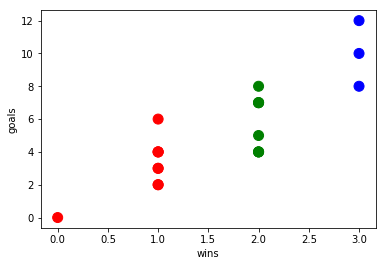

In [69]:
centroids, cluster_map = kmeans2(go_array, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
go.plot.scatter(x='wins', y='goals', c=colors, s=100)

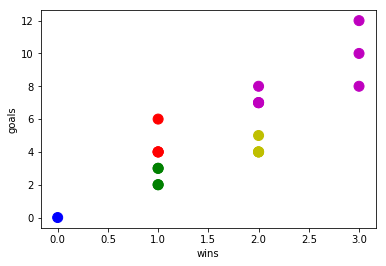

In [71]:
centroids, cluster_map = kmeans2(go_array, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
go.plot.scatter(x='wins', y='goals', c=colors, s=100)